## Numerische Mathematik I: Programmieraufgabe 3

Technische Universität Berlin, Straße des 17. Juni 135, 10623 Berlin, Deutschland

---

**Franklin Liu** 

E-mail: franklin.f.liu@campus.tu-berlin.de

**Aleksandra Soloveva**

E-mail: soloveva@campus.tu-berlin.de

**Allan A. Zea**

E-mail: zealobo@campus.tu-berlin.de

---

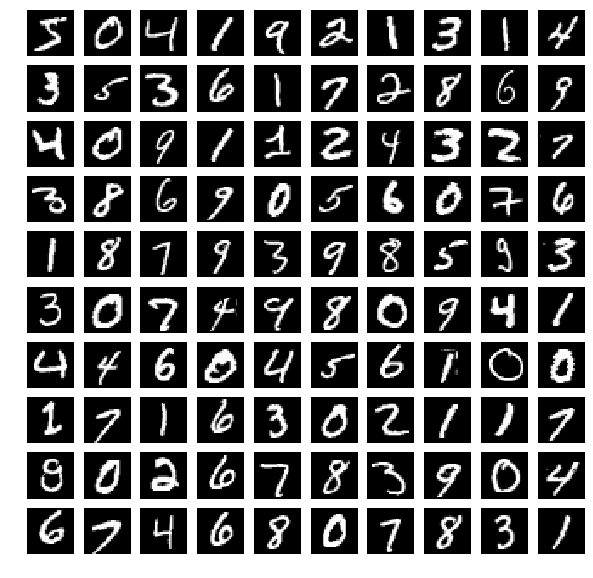

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

imgs = np.fromfile("MNIST/train-images-idx3-ubyte", dtype = np.uint8) 
imgs = np.reshape(imgs[16:], [-1, 28, 28])

# Bild nicht als Matrix, sondern als Vektor dargestellt 
vec_imgs = np.reshape(imgs, (-1, 28 * 28), order = 'F').T

labs = np.fromfile("MNIST/train-labels-idx1-ubyte", dtype = np.uint8) 
labs = labs[8:]

fig, axes = plt.subplots(nrows = 10, ncols = 10, figsize = (10, 10))
for ax, bild in zip(axes.flat, imgs):
    ax.imshow(bild, cmap = 'gray')
    ax.axis('off')

---

**Aufgabe 1.** Schreibe zwei Funktionen, welche für eine gegebene Menge an Bildern $\{x_n :n=0,...,N-1\}$ pixelweise den empirischen Mittelwert und die empirische Varianz,
$$ b = \frac{1}{N} \sum_{n=0}^{N-1} x_n \quad \textrm{und} \quad V=\frac{1}{N} \sum_{n=0}^{N-1} (x_n -b)^2,$$
berechnen, wobei das Quadrat komponentenweise angewendet wird.
Benutze diese Funktionen, um den Mittelwert und die Varianz aus den ersten 100 Trainigsbildern je Ziffer zu bestimmen. Stelle die 10 berechneten Mittelwerte und Varianzen grafisch dar.

---

In [3]:
# A = {x0, x1, ..., xN-1} Menge an Bildern
def empirischer_mittelwert(A):
    return np.mean(A, axis = 0)


def empirische_varianz(A):
    return np.var(A, axis = 0)

/home/allgebrist/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


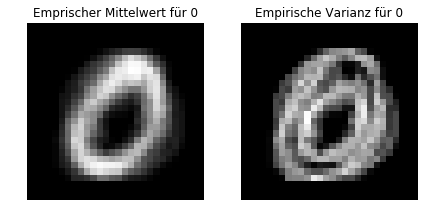

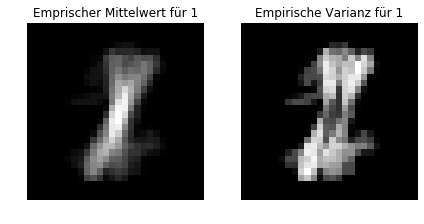

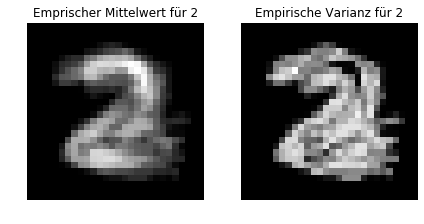

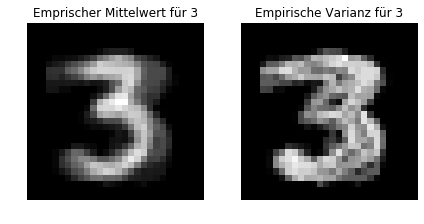

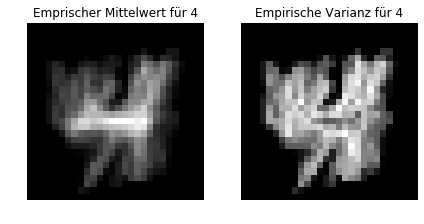

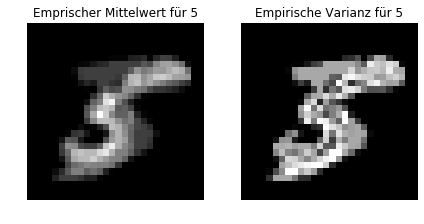

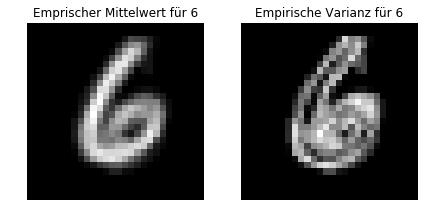

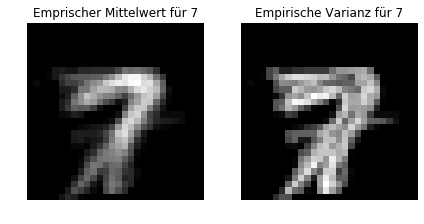

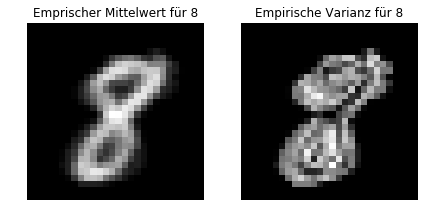

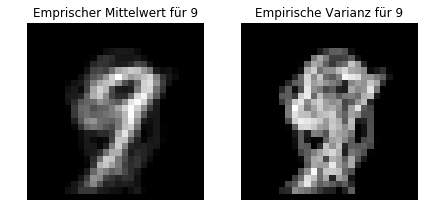

In [4]:
#Anzahl der Trainingsbilder
n = 100

A = vec_imgs[:,:n]

Zahlen = [[] for i in range(10)]

for j in range(n):
    Zahlen[labs[j]].append(A[:,j])


for i in range(len(Zahlen)):
    if Zahlen[i]:
        fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (6, 6))
        for ax, func, name in zip(axes.flat, [empirischer_mittelwert, empirische_varianz], ["Emprischer Mittelwert", "Empirische Varianz"]):
            ax.imshow(func(Zahlen[i]).reshape((28, 28), order = 'F'), cmap = "gray")
            ax.axis("off")
            ax.set_title("{} für {}".format(name, i))    
        fig.tight_layout()          
        fig.show()

---

**Aufgabe 2.** Für die Hauptkomponentenanalyse benötigen wir eine Eigenwertzerlegung der skalierten empirischen Kovarianzmatrix $S = Y Y^T$ mit $Y := [x_0 − b,..., x_{N−1} − b]$, wobei die Daten $x_n$ als Spaltenvektoren dargestellt wurden. Berechne die Eigenwerte der Matrix $S$ und die Singulärwerte von $Y$ mittels entsprechender numpy-Funktionen für die Kovarianzmatrix der ersten 1000 Trainingsbilder und stelle die ersten 50 Eigenwerte und quadrierten Singulärwerte grafisch dar.

---

/home/allgebrist/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1365: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


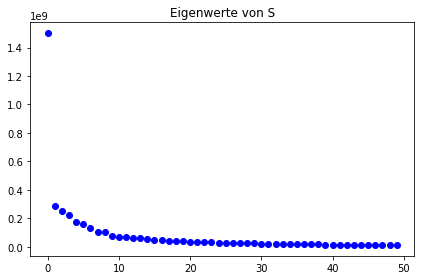

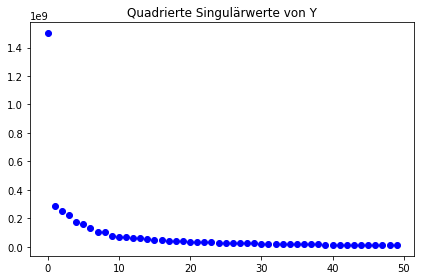

In [5]:
from numpy import linalg as LA
from scipy.linalg import svdvals

# np.set_printoptions(threshold = 1000)

# Anzahl der Trainingbilder
n = 1000
A = vec_imgs[:,:n]


Y = A - empirischer_mittelwert(A)
S = Y @ Y.T

# Anzahl der Eigenwerte bzw. Singulärwerte 
m = 50

EW_S = LA.eigvals(S)[:m]
SW_Y  = LA.svd(Y)[1][:m]


# #Grafisch darstellen  

plt.plot(EW_S, "ob")
plt.title("Eigenwerte von S")
plt.tight_layout()
plt.show()

plt.plot(np.square(SW_Y), "ob")
plt.title("Quadrierte Singulärwerte von Y")
plt.tight_layout()
plt.show()

---

**Aufgabe 3.** Schreibe eine Funktion, welche für einen gegebenen Datensatz den bestmöglichen $d$-dimensionalen affinen Unterraum $H_d = \{At + b : t \in \mathbb{R}^d\}$, sodass
$$(A, b) := \underset{A,b}{\operatorname{argmin}} \sum_{n=0}^{N-1} || \operatorname{proj}_{Hd} (x_n) − x_n||_2^2,$$
bestimmt. Benutze diese Funktion, um den Mittelwert und die ersten fünf Hauptkomponenten für die ersten 1000 Trainingsbilder zu bestimmen. Stelle den Mittelwert und die Hauptkomponenten grafisch dar. Schreibe eine Funktion, welche ein Test-Datum auf den bestimmten Unterraum $H_d$ projiziert. Wähle vier beliebige Testdaten, projiziere auf die ersten fünf Hauptkomponenten und stelle Testbild und Projektion grafisch dar.


---

In [6]:
def affinerUR(X, d):
    b = np.mean(X, axis = 1)
    U = LA.svd(X - d)[0]
    A = U[:,:d]
            
    return (A, b)

In [7]:
def projektion(A, b, x):
    return (A @ A.T) @ (x - b) + x 
    
def const(A, b, x):
    return x

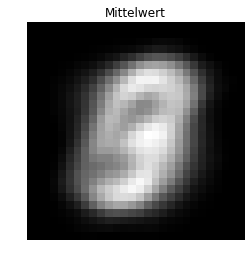

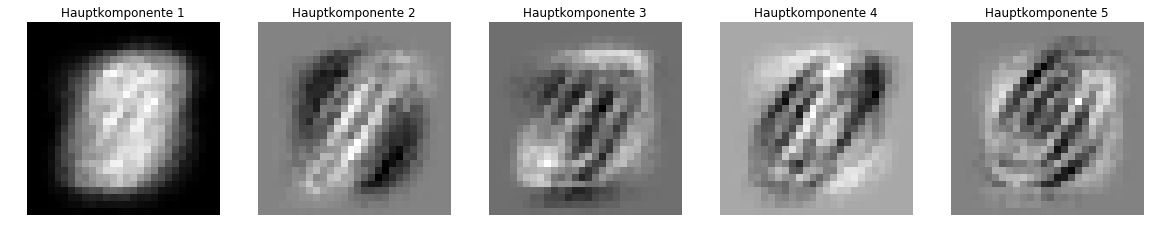

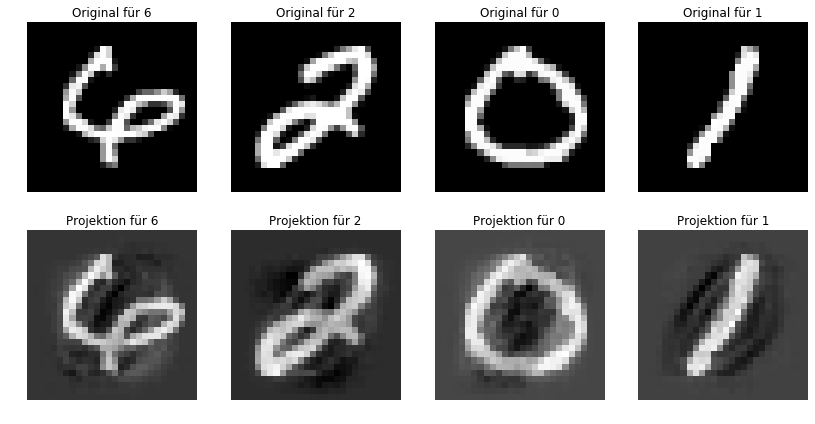

In [8]:
# Anzahl der Hauptkomponenten
k = 5

X = vec_imgs[:,:1000]
A, b = affinerUR(X, k)

# Mittelwert darstellen
plt.imshow(b.reshape(28, 28, order = 'F'), cmap = "gray")
plt.title("Mittelwert")
plt.axis("off")

# Hauptkomponenten darstellen
fig1, axes1 = plt.subplots(nrows = 1, ncols = k, figsize = (20, 20))
for ax, i in zip(axes1.flat, range(k)):
    ax.imshow(A[:,i].reshape(28, 28, order = 'F'), cmap = "gray")
    ax.axis("off")
    ax.set_title("Hauptkomponente {}".format(i + 1))

# Anzahl der Testdaten
tests = 4

# Projektion darstellen
fig2, axes2 = plt.subplots(nrows = 2, ncols = tests, figsize = (14, 7))

for j in range(tests):
    r = np.random.randint(0, 1000)
    for func, name, i in zip([const, projektion], ["Original", "Projektion"], range(2)):
        ax = axes2[i,j]
        ax.imshow(func(A, b, X[:,r]).reshape(28, 28, order = 'F'), cmap = "gray")
        ax.axis("off")
        ax.set_title("{} für {}".format(name, labs[r]))

---

**Aufgabe 4.**  Implementiere den $K$-Means-Algorithmus. Erzeuge einen Datensatz bestehend aus den ersten 1000 Trainingsbildern für zwei unterschiedliche Ziffern. Projiziere die Daten auf die ersten beiden Hauptkomponenten der gewählten Daten mittels
$$A^T (x_n − b).$$
Verwende den $K$-Means-Algorithmus, um die reduzierten Daten in zwei Klassen einzuteilen, wobei die ersten Klassenmittelpunkte den Mittelwerten der projizierten zwei Ziffern entsprechen. Stelle die erhaltene Klassifizierung mit $\texttt{matplotlib.pyplot.scatter}$ grafisch dar. Wähle nun für jede der beiden Ziffern 100 Testbilder aus und klassifiziere diese. Stelle in einer Tabelle dar, wie viele Testbilder je Ziffer richtig und falsch klassifiziert wurden.


---

In [9]:
def hauptkomponenten_projektion(A, x, b):
    return A.T @ (x - b)


def get_data_wlabs(X, lab, ziffer, anzahl):
    data = np.zeros((28 * 28, anzahl))
    labs = np.full((anzahl), ziffer)
    i, j = 0, 0
    while i < anzahl:
        if lab[j] == ziffer:
            data[:,i] = X[:,j]
            i+=1
        j+=1
    return (data, labs)


def projected_data(X, lab, z1, z2, anzahl):
    X1, labels1 = get_data_wlabs(X, lab, z1, anzahl)
    X2, labels2 = get_data_wlabs(X, lab, z2, anzahl)

    X3 = np.concatenate((X1,X2), axis = 1)
    labels = np.concatenate((labels1,labels2))

    A, b = affinerUR(X3, 2)
    b =  b.reshape((28 * 28),1)
    proj = hauptkomponenten_projektion(A, X3, b)

    return (proj, A, b)

In [10]:
z1 = 2
z2 = 9
anzahl = 1000
proj = projected_data(vec_imgs, labs, z1, z2, anzahl)[0]

def prototypen_zuordnung(proj, prototypen):
    K = prototypen.shape[0]
    indizes = np.zeros((proj.shape[1], 1))
    abstaende = np.zeros((prototypen.shape[0], 1))
    
    for i in range(proj.shape[1]):
        for j in range(K):
            abstaende[j] = np.sum(([proj[:,i]] - prototypen[j,:])**2)
        indizes[i] = np.argmin(abstaende) + 1
    return indizes


# Wir wählen zwei Anfangsprototypen r1 und r2 aus
r1, r2  = np.mean(proj[:, :anzahl], axis = 1), np.mean(proj[:, anzahl:], axis = 1)

anfangsprototypen = np.array([r1, r2])
indizes = prototypen_zuordnung(proj, anfangsprototypen)

print("Prototypen für die ersten zehn Bilder:\n", indizes[0:10])

Prototypen für die ersten zehn Bilder:
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]]


In [11]:
def neue_prototypen(proj, indizes, K):
    m, n = proj.shape[0], proj.shape[1]
    prototypen = np.zeros((K, m))
    total = np.zeros((K, 1))
    
    for i in range(n):
        index = int((indizes[i] - 1)[0])
        prototypen[index,:] += proj[:,i]
        total[index] += 1
    
    return prototypen / total

K = 2
prototypen = neue_prototypen(proj, indizes, K)
print("Berechnete Prototypen nach dem Initialisierungsschritt:\n", prototypen)

Berechnete Prototypen nach dem Initialisierungsschritt:
 [[  80.68690571 -634.32728349]
 [ -79.56514138  625.50843347]]


In [12]:
def Kmeans(X, prototypen, indizes, K, iterationen):
    fig, ax = plt.subplots(nrows = iterationen, ncols = 1, figsize = (5, 10))
    for i in range(iterationen):    
        farbe = "rgb"
        for k in range(1, K + 1):
            temp = (indizes == k).reshape(X.shape[1], 1)
            ax[i].scatter(X[0, temp[:,0]], X[1, temp[:,0]], c = farbe[(k - 1) * 2], s = 15)
            
        ax[i].scatter(prototypen[:,0], prototypen[:,1], s = 50, marker = "x", c = "black", linewidth = 3)
        ax[i].set_title(str(i + 1) + ". Iteration")

        prototypen = neue_prototypen(X, indizes, K)
        indizes = prototypen_zuordnung(X, prototypen)
        print("Prototypen:\n", prototypen)

    plt.tight_layout()
    plt.show()

    return prototypen

In [13]:
def klassifizierung(labs, proj, prototypen, z1, z2):
    n = proj.shape[1]
    klassen = np.zeros_like(labs)
    for i in range(n):
        if np.sum((prototypen[0,:] - proj[:,i])**2) <= np.sum((prototypen[1,:] - proj[:,i])**2):
            klassen[i] = z1
        else:
            klassen[i] = z2
    
    true_z1, true_z2 = 0, 0
    for i in range(n):
        if klassen[i] == z1 and i < (n // 2):
            true_z1 += 1
        if klassen[i] == z2 and i >= (n // 2):
            true_z2 += 1
    
    print("Für die Ziffer {} wurden {} Bilder richtig und {} Bilder falsch klassifiziert.".format(z1, true_z1, (n // 2) - true_z1))
    print("Für die Ziffer {} wurden {} Bilder richtig und {} Bilder falsch klassifiziert.".format(z2, true_z2, (n // 2) - true_z2))
    print("Die Ziffern {} und {} wurden zu {}% richtig klassifiziert.".format(z1, z2, (sum(klassen == labs) / labs.shape[0]) * 100))

Prototypen:
 [[  80.68690571 -634.32728349]
 [ -79.56514138  625.50843347]]
Prototypen:
 [[  83.42112985 -637.91595414]
 [ -81.28001496  621.54298789]]
Prototypen:
 [[  84.18774989 -639.7740417 ]
 [ -81.53616722  619.62367818]]
Prototypen:
 [[  84.18774989 -639.7740417 ]
 [ -81.53616722  619.62367818]]


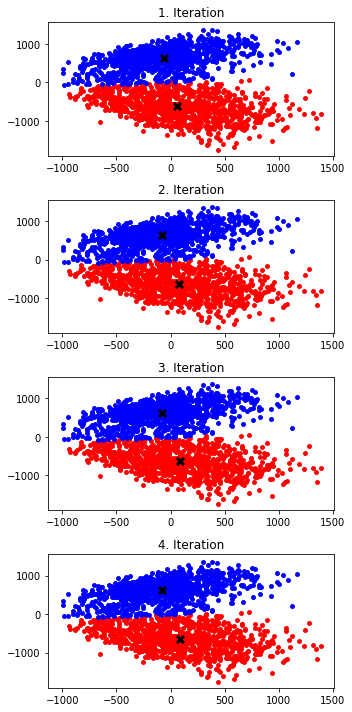

Für die Ziffer 2 wurden 94 Bilder richtig und 6 Bilder falsch klassifiziert.
Für die Ziffer 9 wurden 98 Bilder richtig und 2 Bilder falsch klassifiziert.
Die Ziffern 2 und 9 wurden zu 96.0% richtig klassifiziert.


In [14]:
test_imgs = np.fromfile("MNIST/t10k-images-idx3-ubyte", dtype = np.uint8) 
test_imgs = np.reshape(test_imgs[16:], [-1, 28, 28])

# Bilder nicht als Matrix, sondern als Vektoren dargestellt 
vec_test_imgs = np.reshape(test_imgs, (-1, 28 * 28), order = 'F').T

test_labs = np.fromfile("MNIST/t10k-labels-idx1-ubyte", dtype = np.uint8) 
test_labs = test_labs[8:]

z1 = 2
z2 = 9
anzahl_training = 1000
anzahl_test = 100
K = 2

proj, A, b = projected_data(vec_imgs, labs, z1, z2, anzahl_training)
r1, r2 = np.mean(proj[:, :anzahl_training], axis = 1), np.mean(proj[:,anzahl:], axis = 1)
indizes = prototypen_zuordnung(proj, np.array([r1, r2]))
prototypen = Kmeans(proj, anfangsprototypen, indizes, K, 4)

X1 = get_data_wlabs(vec_test_imgs, test_labs, z1, anzahl_test)[0]
X2 = get_data_wlabs(vec_test_imgs, test_labs, z2, anzahl_test)[0]
X3 = np.concatenate((X1, X2), axis = 1)


test_proj = hauptkomponenten_projektion(A, X3, b)
test_labs = np.concatenate((np.full((anzahl_test), z1), np.full((anzahl_test), z2)))

klassifizierung(test_labs, test_proj, prototypen, z1, z2)